In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('Diet_R.csv')

In [ ]:
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
11,10,0.0,45,165,70,1,66.9
70,71,1.0,31,177,78,3,75.2
45,15,1.0,39,168,71,1,71.6
41,63,0.0,35,171,72,3,64.4
77,78,1.0,51,175,88,3,81.9
26,37,0.0,16,165,68,2,63.8
39,61,0.0,37,170,70,3,62.7
64,50,1.0,39,180,80,2,81.4
4,3,0.0,55,170,64,1,63.3
47,17,1.0,40,173,74,1,69.5


Tính cân nặng giảm

In [ ]:
df['losingweight'] = df['pre.weight'] - df['weight6weeks']

In [ ]:
df_diet_losing = df[['Diet','losingweight']].copy()

In [ ]:
df_diet_losing.head(10)

,Diet,losingweight
0,2,0.0
1,2,0.0
2,1,3.8
3,1,6.0
4,1,0.7
5,1,2.9
6,1,2.8
7,1,2.0
8,1,2.0
9,1,8.5


**SỰ KHÁC NHAU VỀ HIỆU QUẢ CỦA CÁC PHƯƠNG PHÁP GIẢM CÂN**

Phát biểu giải thuyết thống kê

H0: không có sự khác biệt về hiệu quả giảm cân giữa 3 phương pháp

H1: có ít nhất hai kiểu phương pháp khác nhau về hiệu quả giảm cân

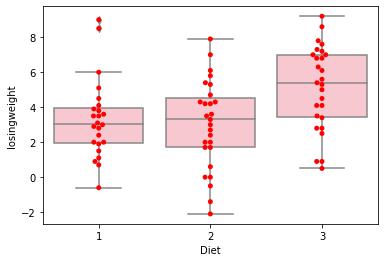

In [ ]:
sns.boxplot(x='Diet',y='losingweight',data = df_diet_losing, color='pink')
sns.swarmplot(x='Diet',y='losingweight', data = df_diet_losing, color='red')
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
model = ols('losingweight ~ C(Diet)', data=df_diet_losing).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


In [ ]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [ ]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,6.197447,0.003229,Chấp nhận H1 với mức ý nghĩa 0.05


**Kiểm tra hậu nghiệm**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=df_diet_losing['losingweight'],
                         groups=df_diet_losing['Diet'],
                         alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.2741,0.9,-1.8806,1.3325,False
1,3,1.8481,0.0201,0.2416,3.4547,True
2,3,2.1222,0.0048,0.5636,3.6808,True


**Kiểm tra các điều kiện cho kiểm đinh anova**

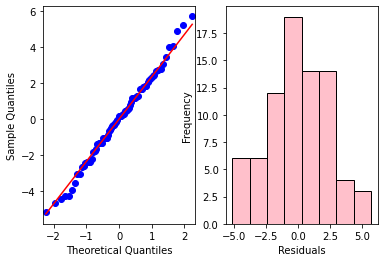

In [ ]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k',color= "pink")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [73]:
p_v = stats.shapiro(model.resid)[1]

In [74]:
p_v

0.916061520576477

**kiểm tra phân phối chuẩn**

In [ ]:
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn


In [ ]:
df_gen_losingweight = df[['gender','losingweight']].copy()

df_gen_losingweight = df_gen_losingweight.replace(r'^\s*$', np.nan, regex=True)

df_gen_losingweight = df_gen_losingweight.dropna()

df_gen_losingweight.head(10)

,gender,losingweight
2,0.0,3.8
3,0.0,6.0
4,0.0,0.7
5,0.0,2.9
6,0.0,2.8
7,0.0,2.0
8,0.0,2.0
9,0.0,8.5
10,0.0,1.9
11,0.0,3.1


**SỰ KHÁC NHAU VỀ HIỆU QUẢ GIẢM CÂN VỚI CÁC GIỚI TÍNH KHÁC NHAU**

Phát biểu giải thuyết thống kê

H0: không có sự khác biệt về hiệu quả giảm cân đối với các giới tính khác nhau

H1: Các giới khác nhau về hiệu quả giảm cân

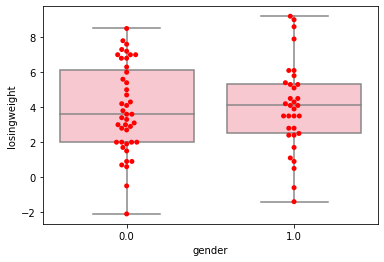

In [ ]:
sns.boxplot(x='gender',y='losingweight',data = df_gen_losingweight, color='pink')
sns.swarmplot(x='gender',y='losingweight', data = df_gen_losingweight, color='red')
plt.show()

In [ ]:
model_2 = ols('losingweight ~ C(gender)', data=df_gen_losingweight).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)

In [ ]:
anova_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


In [ ]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,0.043786,0.834827,Chấp nhận H0 với mức ý nghĩa 0.05


Không cần tiến hành kiểm tra hậu nghiệm

Kiểm tra các điều kiện cho kiểm định Anova

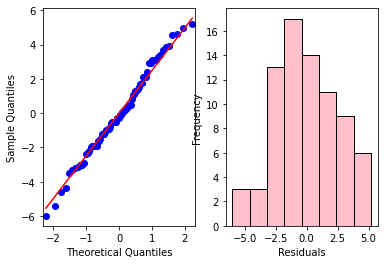

In [ ]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model_2.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model_2.resid, bins='auto', histtype='bar', ec='k',color="pink")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [78]:
p_v_2 = stats.shapiro(model_2.resid)[1]

In [79]:
p_v_2

0.702639102935791

In [ ]:
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn
